# Research Skills: Image Analysis 
## Worksheet 4 : Morphological Image Analysis

- ++ Set tehory on two images -original image + structuring element
Sharon Ong, Department of Cognitive Science and Artificial Intelligence - Tilburg University

Mathematical morphology is a powerful tool that can be used to extract features and components from an image. It is often used to pre-process or post-process images to facilitate analysis. In morphology, a small shape (structuring element) is translated across the image during the course of processing. Certain mathematical logic operations can be performed on the image using the structuring element to generate the processed image.

In the session, we will learn
* Different structuring elements 
* Dilation, Erosion, Opening and Closing on Binary Images 
* Morphological Operations on Grayscale Images
* Labelling Connected Components and Shape and Region Properties  
* Thinning and Skeletonization 

In [36]:
from skimage.morphology import square, rectangle, diamond, disk, cube,  octahedron, ball, star, octagon 
from skimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing
from skimage.morphology import dilation, erosion, opening, closing, white_tophat
from skimage import img_as_float
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1 Structuring elements 
A structuring element is a matrix consisting of only 0's and 1's and can consist of arbitrary shapes and sizes. The pixels with values of 1 define the neighborhood. Structuring elements are typically much smaller than the image being processed. The center
pixel of the structuring element, called the origin, identifies the pixel being processed. The  pixels in the structuring element containing 1's define the neighborhood of the structuring element.

In [37]:
width1 = 5
radius1 = 2
height1 = width1+2

se_sq = square(width1) # structuring element
se_rect = rectangle(height1,width1)
se_diamond = diamond(radius1+1) #7*7 matrix
se_disk = disk(radius1+1)
se_cube = cube(width1) #3d
se_octa = octahedron(radius1) #3d
se_ball = ball(radius1) #3d
se_star = star(radius1)
print("square se:\n", se_sq)
print("rectangle se:\n",se_rect)
print("diamond se:\n",se_diamond)
print("disk se:\n", se_disk)
print("cube se:\n", se_cube) 
print("octa se:\n", se_octa) 
print("ball se:\n", se_ball) 
print("star se:\n", se_star) 


square se:
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
rectangle se:
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
diamond se:
 [[0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]]
disk se:
 [[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]
cube se:
 [[[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]]
octa se:
 [[[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 1 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]

 [[0 0 0 0 0]
  [0 0 1 0 0]
  [0 1 1 1 0]
  [0 0 1 0 0]
  [0 0 0 0 0]]

 [[0 0 1 0 0]
  [0 1 1 1 0]


Which structuring elements are 2D and which are 3D? 
Create the square, diamond, disk and star structuring elements with increase the "width1" variable to 20 and the "radius1" variable to 9. Use imshow to display the larger structing elements.  

square se:
 [[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]
diamond se:
 [[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 

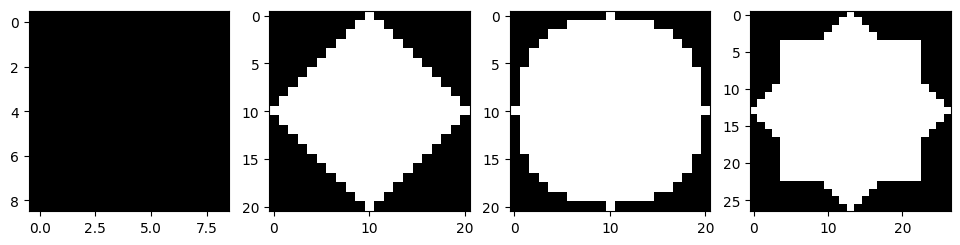

In [38]:
#
# Your code goes here 
# 
radius1 = 9
width1 = 9
height1 = width1+2

se_sq = square(width1) # structuring element
se_diamond = diamond(radius1+1) #7*7 matrix
se_disk = disk(radius1+1)
se_star = star(radius1)


print("square se:\n", se_sq)
print("diamond se:\n",se_diamond)
print("disk se:\n", se_disk)
print("star se:\n", se_star) 

plt.figure(figsize=(15,5))  #black because of range (set vmin and vmax)
plt.subplot(1,5,1)
plt.imshow(se_sq, cmap='gray')
plt.subplot(1,5,2)
plt.imshow(se_diamond, cmap='gray')
plt.subplot(1,5,3)
plt.imshow(se_disk, cmap='gray')
plt.subplot(1,5,4)
plt.imshow(se_star, cmap='gray')

# 2 Dilation, Erosion, Opening and Closing on Binary Images  
## 2.1 Dilation 
Dilation is an operation that grows (thickens) objects in a binary image. The thickening is controlled by a small structuring element. We can also create our own structuring element 

Text(0.5, 1.0, 'Dilated Image')

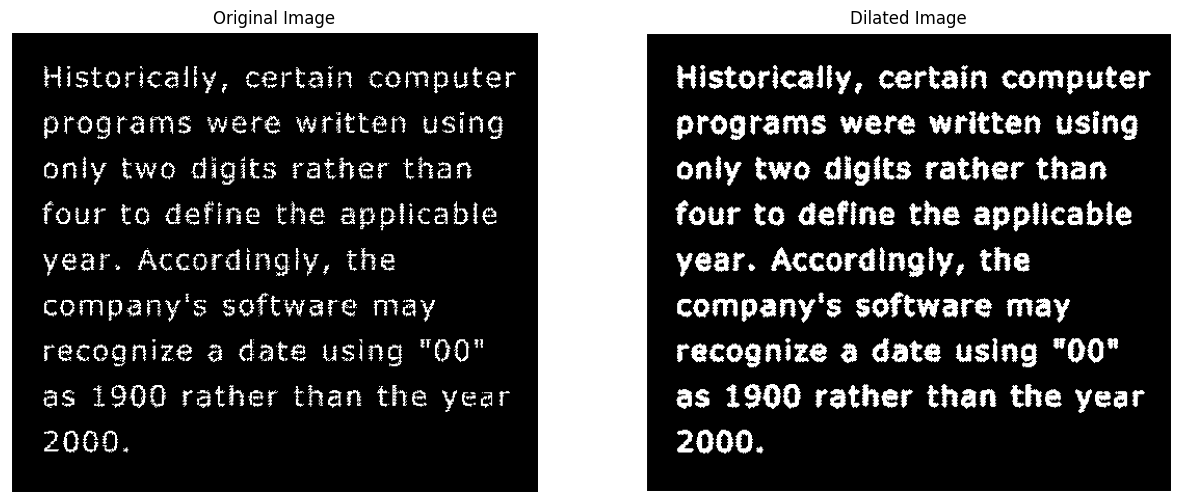

In [39]:
from skimage.morphology import binary_dilation 
from skimage import img_as_float
from skimage import io
# load image
im = img_as_float(io.imread('images/broken-text.tif'))

# let's create our own structing elmment 
se = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
# and this is 
im2 = binary_dilation(im, se);
plt.figure(figsize=(15,7)) 
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(im2,cmap='gray')
plt.axis('off')
plt.title('Dilated Image')

Generate different structuring elements (e.g. disk) and apply them to broken-text.tif. Try also applying several dilations consecutively. 

Text(0.5, 1.0, 'Dilated Image (disk(1))')

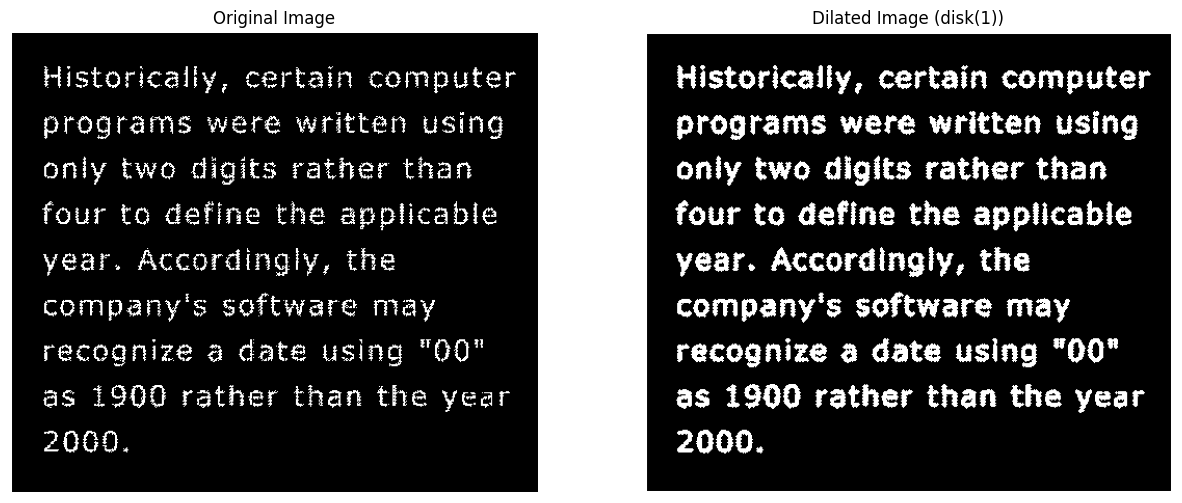

In [40]:
#
# Your code goes here 
#
im2 = binary_dilation(im, disk(1)) #radius of 1 + center pixel -> with of 3
plt.figure(figsize=(15,7)) 
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(im2,cmap='gray')
plt.axis('off')
plt.title('Dilated Image (disk(1))')

Text(0.5, 1.0, 'Dilated Image (disk(1))')

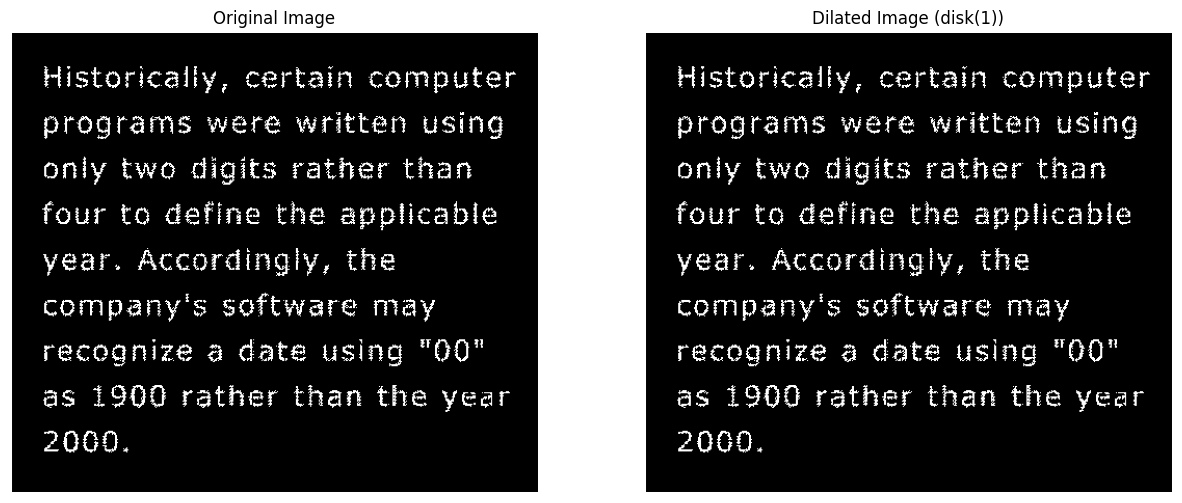

In [41]:
#
# Your code goes here 
#
im2 = binary_dilation(im, square(1)) #does not changes anyting
plt.figure(figsize=(15,7)) 
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(im2,cmap='gray')
plt.axis('off')
plt.title('Dilated Image (disk(1))')

## 2.2 Erosion 
Erosion shrinks or thins objects in a binary image. After erosion, the pixels that survive are
only those where the structuring element fits entirely in the foreground.
The follwing code applies erosion on a binary image with disk structuring element with a radii of 10 pixels. 

Text(0.5, 1.0, 'Eroded Image')

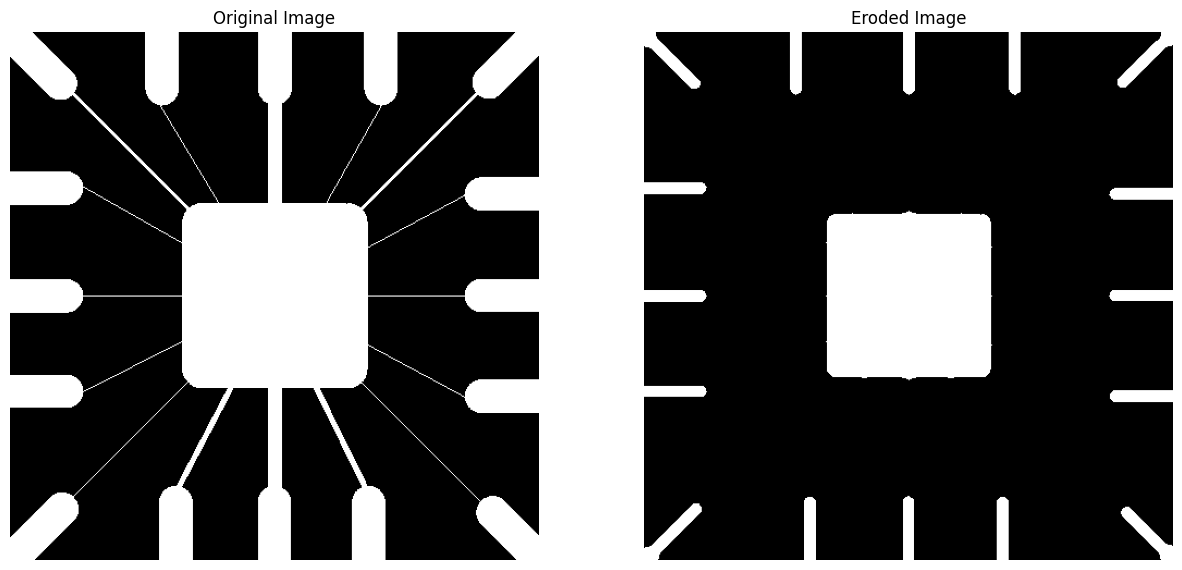

In [42]:
im = img_as_float(io.imread('images/wirebond-mask.tif'))
se = disk(10)
im2 = binary_erosion(im,se);
plt.figure(figsize=(15,7)) 
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(im2,cmap='gray')
plt.axis('off')
plt.title('Eroded Image')

Try disks of radius 3 and 20

Text(0.5, 1.0, 'Eroded Image disk(3)')

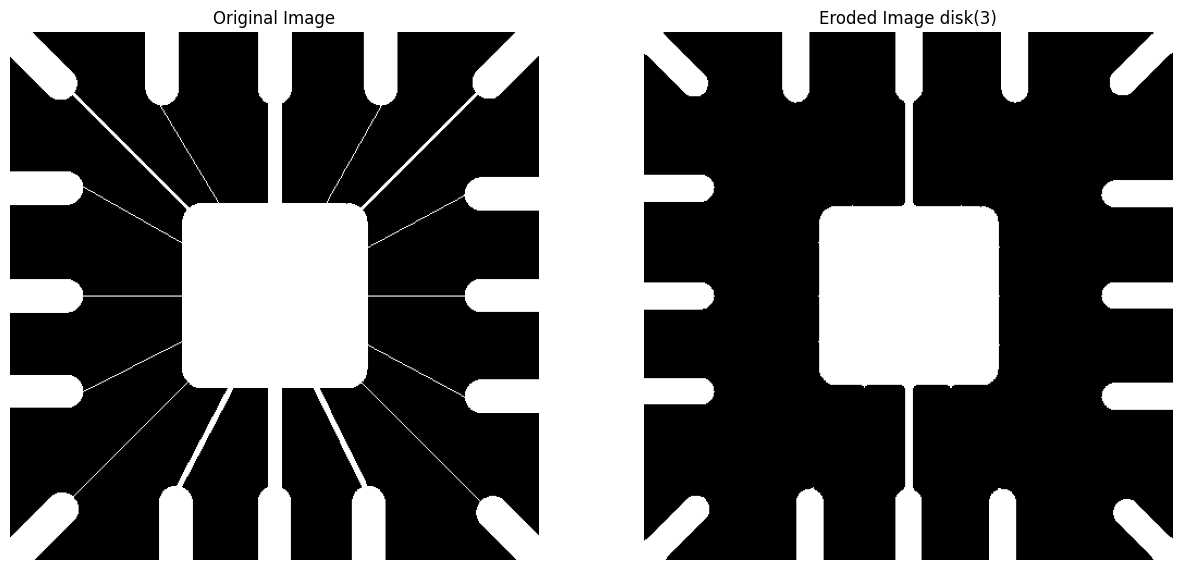

In [43]:
#
#  Your code goes here 
#
im = img_as_float(io.imread('images/wirebond-mask.tif'))
se = disk(3)
im2 = binary_erosion(im,se);
plt.figure(figsize=(15,7)) 
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(im2,cmap='gray')
plt.axis('off')
plt.title('Eroded Image disk(3)')


Text(0.5, 1.0, 'Eroded Image disk(20)')

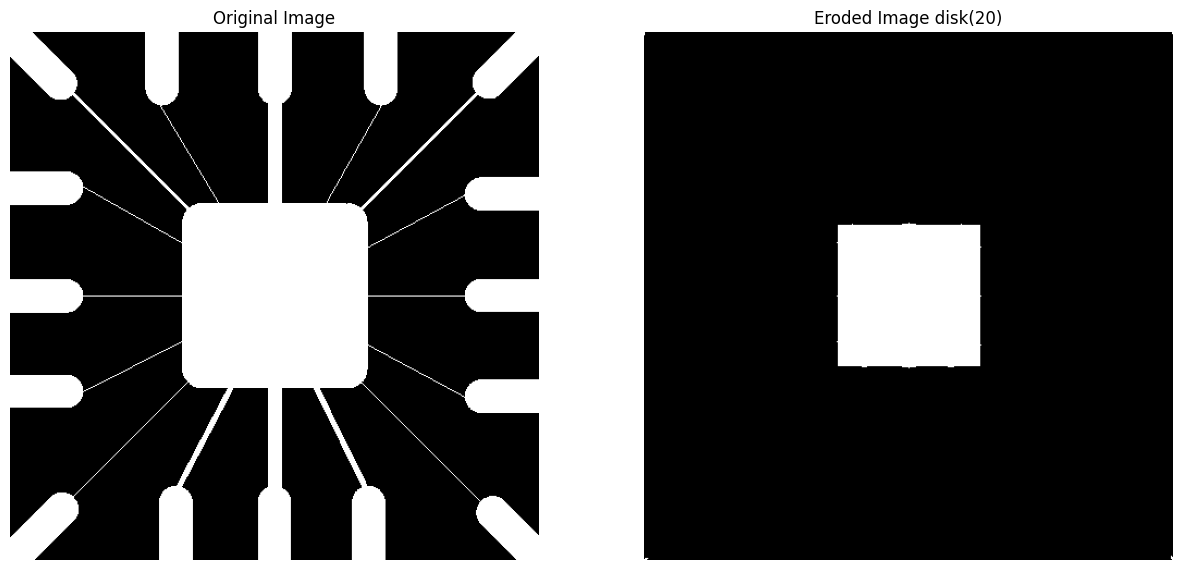

In [44]:
#
#  Your code goes here 
#
im = img_as_float(io.imread('images/wirebond-mask.tif'))
se = disk(20)
im2 = binary_erosion(im,se);
plt.figure(figsize=(15,7)) 
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(im2,cmap='gray')
plt.axis('off')
plt.title('Eroded Image disk(20)')


Text(0.5, 1.0, 'Eroded Image star(20)')

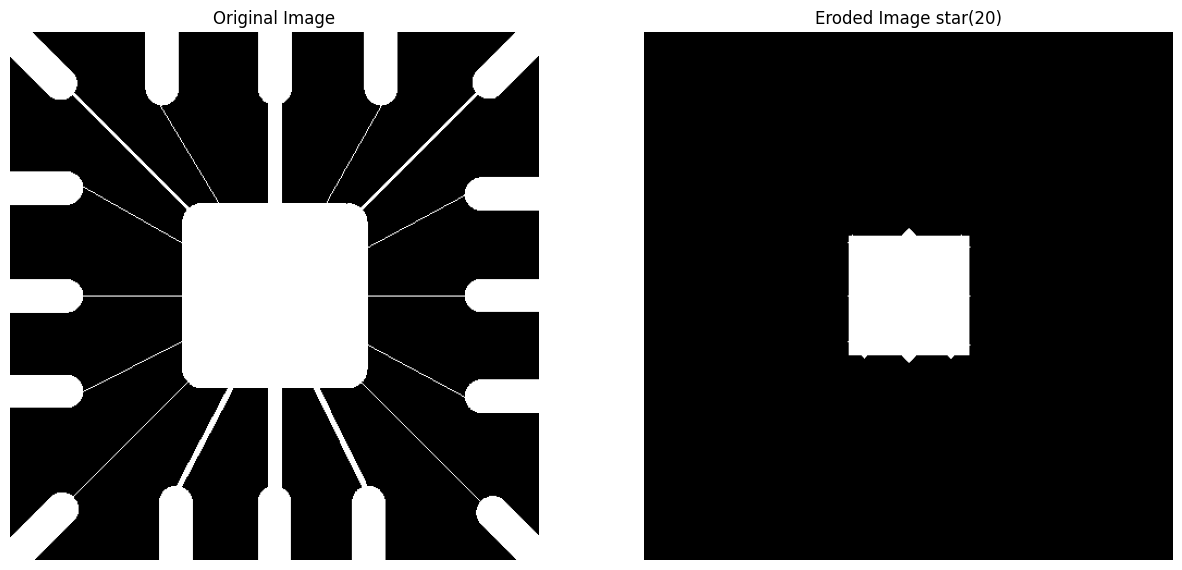

In [45]:
#
#  Your code goes here 
#
im = img_as_float(io.imread('images/wirebond-mask.tif'))
se = star(20)
im2 = binary_erosion(im,se);
plt.figure(figsize=(15,7)) 
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(im2,cmap='gray')
plt.axis('off')
plt.title('Eroded Image star(20)')


Text(0.5, 1.0, 'Eroded Image square(40)')

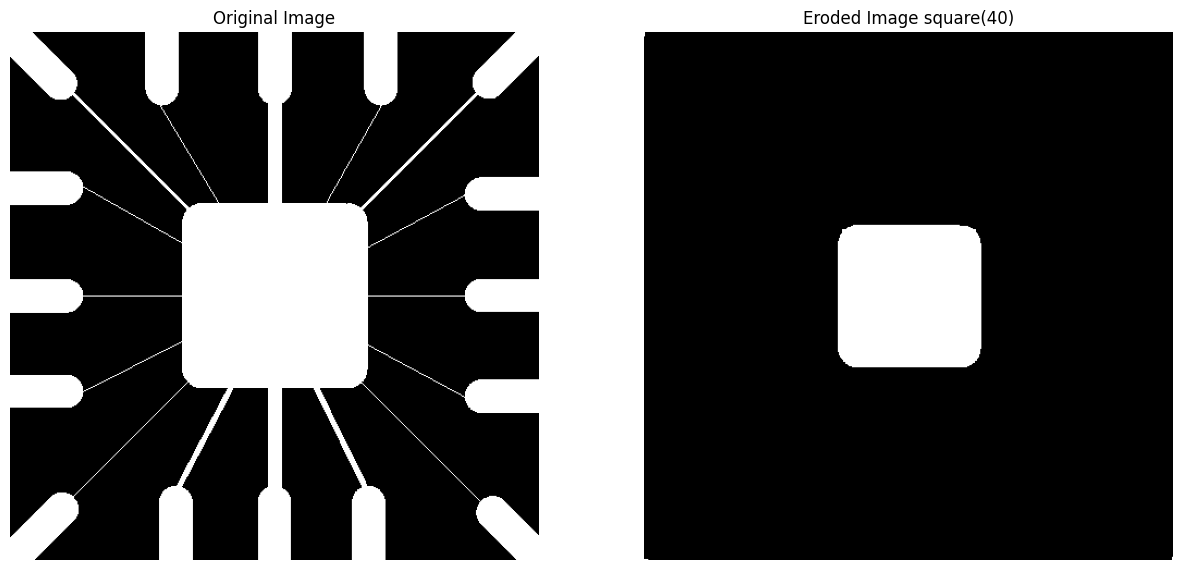

In [46]:
#
#  Your code goes here 
#
im = img_as_float(io.imread('images/wirebond-mask.tif'))
se = square(40)
im2 = binary_erosion(im,se);
plt.figure(figsize=(15,7)) 
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(im2,cmap='gray')
plt.axis('off')
plt.title('Eroded Image square(40)') #edges nicer showed


## 2.3 Opening and Closing
Combinations of morphological operations can be very useful and help remove many artifacts present in images. This will become very useful after segmenting an image. The opening operation is an erosion followed by a dilation. Opening smoothes object contours, breaks thin connections and removes thin protrusions. After opening, all objects smaller than the structuring element will disappear. The closing operation is an dilation followed by a erosion. Closing smooths object contours
and joins narrow breaks.

(<AxesSubplot: title={'center': 'Image after erosion'}>,
 (-0.5, 521.5, 296.5, -0.5),
 Text(0.5, 1.0, 'Image after erosion'))

<Figure size 640x480 with 0 Axes>

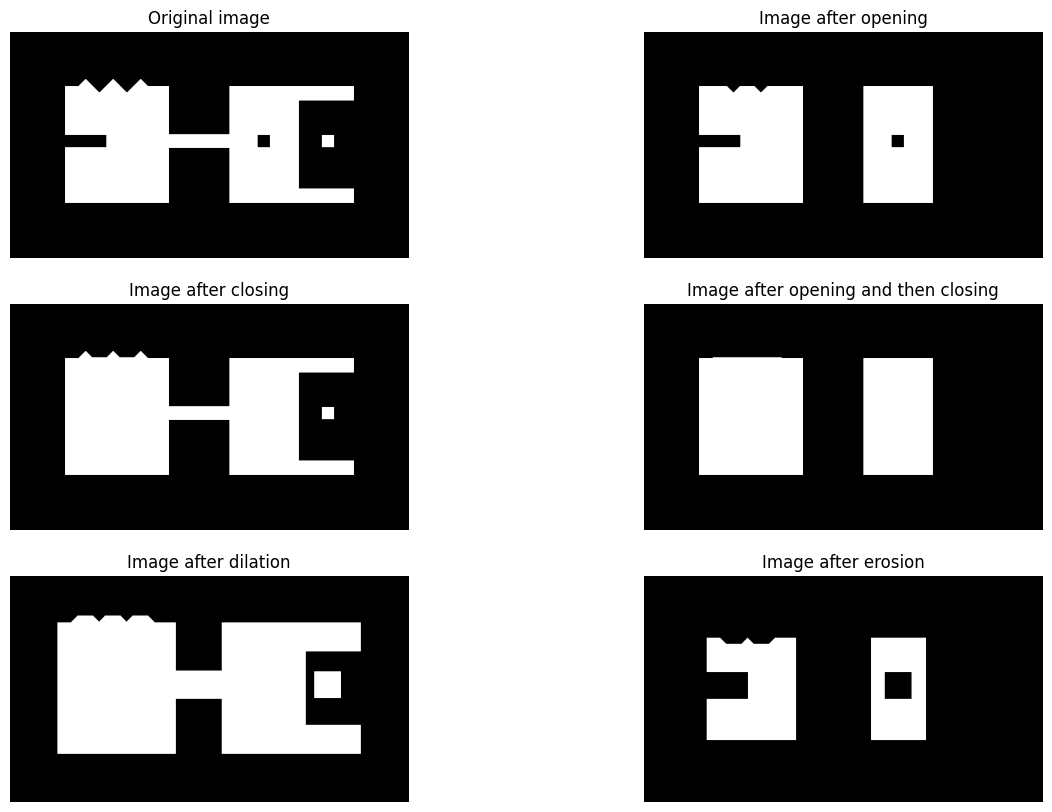

In [47]:
im = img_as_float(io.imread('images/wirebond-mask.tif'))
im = img_as_float(io.imread('images/shapes.tif'))
se = square(20)
imd = binary_dilation(im,se); #rolling sqare over image
ime = binary_erosion(im,se);
imo = binary_opening(im,se); # repeat opening. Does image change: No
imc = binary_closing(im,se); # 
imoc =binary_closing(imo,se);
imco =binary_opening(imc,se);
# sets colormap to gray 
plt.gray()
plt.figure(figsize = (15,10))
plt.subplot(3,2,1), plt.imshow(im), plt.axis('off'), plt.title('Original image')
plt.subplot(3,2,2), plt.imshow(imo), plt.axis('off'), plt.title('Image after opening')
plt.subplot(3,2,3), plt.imshow(imc), plt.axis('off'), plt.title('Image after closing')
plt.subplot(3,2,4), plt.imshow(imco), plt.axis('off'), plt.title('Image after opening and then closing')
plt.subplot(3,2,5), plt.imshow(imd), plt.axis('off'), plt.title('Image after dilation')
plt.subplot(3,2,6), plt.imshow(ime), plt.axis('off'), plt.title('Image after erosion')

## 2.4 Extracting an object's boundary 
The code below shows how you can extract an objects boundary with erosion 

(<AxesSubplot: title={'center': 'Image boundary'}>,
 (-0.5, 565.5, 565.5, -0.5),
 Text(0.5, 1.0, 'Image boundary'))

<Figure size 640x480 with 0 Axes>

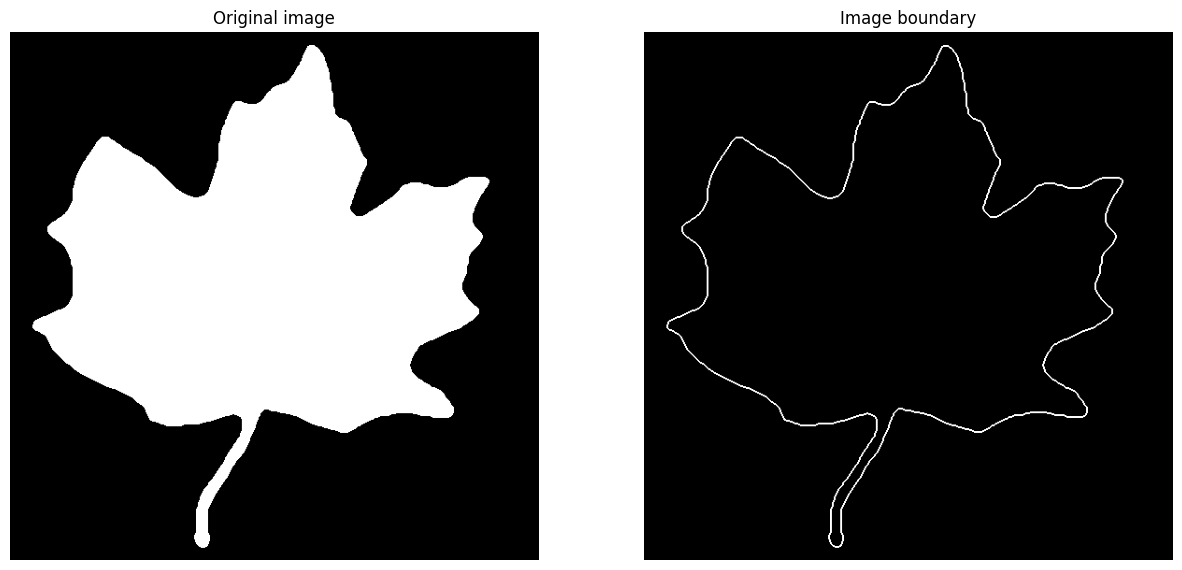

In [48]:
im = img_as_float(io.imread('images/mapleleaf.tif'))
im_erode = binary_erosion(im,disk(2))
im_boundary = im - im_erode # image # eroded image!
plt.gray()
plt.figure(figsize = (15,12))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Original image')
plt.subplot(122), plt.imshow(im_boundary), plt.axis('off'), plt.title('Image boundary')




(<AxesSubplot: title={'center': 'Image boundary'}>,
 (-0.5, 565.5, 565.5, -0.5),
 Text(0.5, 1.0, 'Image boundary'))

<Figure size 640x480 with 0 Axes>

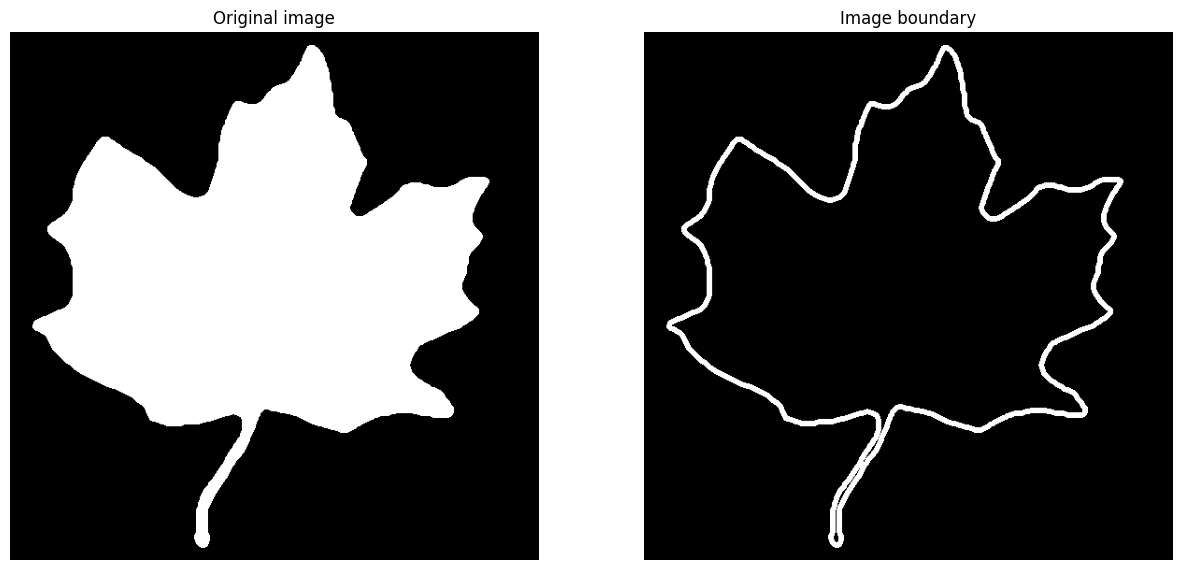

In [49]:
im = img_as_float(io.imread('images/mapleleaf.tif'))
im_erode = binary_erosion(im,disk(6))
im_boundary = im - im_erode # image # eroded image!
plt.gray()
plt.figure(figsize = (15,12))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Original image')
plt.subplot(122), plt.imshow(im_boundary), plt.axis('off'), plt.title('Image boundary')




## 2.5 Removing small objects
The following code block shows how the remove_small_objects() function can be used
to remove objects smaller than a specified minimum size threshold—the higher the
specified threshold, the more objects get removed:

(<AxesSubplot: title={'center': 'Removed objects less than 2500 pixels'}>,
 (-0.5, 674.5, 530.5, -0.5),
 Text(0.5, 1.0, 'Removed objects less than 2500 pixels'))

<Figure size 640x480 with 0 Axes>

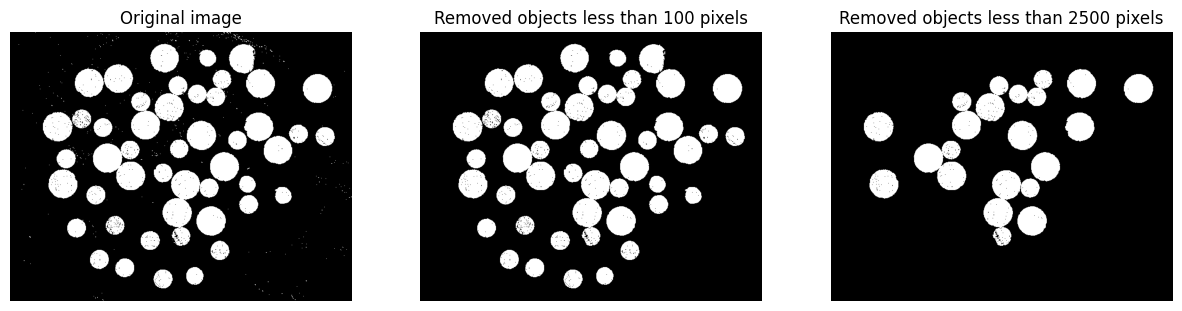

In [50]:
from skimage.morphology import remove_small_objects

#!!!! removes noise
im = io.imread('images/wood-dowels-binary-noisy.tif')
im = im < 0.5 
#im = 1 - im 
#Set threshold to 100 pixels
im1 = remove_small_objects(im, 100, connectivity=1)
#Set threshold to 2500 pixels
im2 = remove_small_objects(im, 2500, connectivity=1)

# why are three small circles in the middle top?
# seen as one component (3 circles are together)

plt.gray()
plt.figure(figsize = (15,12))
plt.subplot(131), plt.imshow(im), plt.axis('off'), plt.title('Original image')
plt.subplot(132), plt.imshow(im1), plt.axis('off'), plt.title('Removed objects less than 100 pixels')
plt.subplot(133), plt.imshow(im2), plt.axis('off'), plt.title('Removed objects less than 2500 pixels')

## 2.6 Hole filling 
We may need fill the holes in a binary image. For example, we detect the boundary of a cell and want to obtain an object which is filled and covers the whole cell area.

(512, 512)


(<AxesSubplot: title={'center': 'Binary holes filling square size = 50 '}>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1.0, 'Binary holes filling square size = 50 '))

<Figure size 640x480 with 0 Axes>

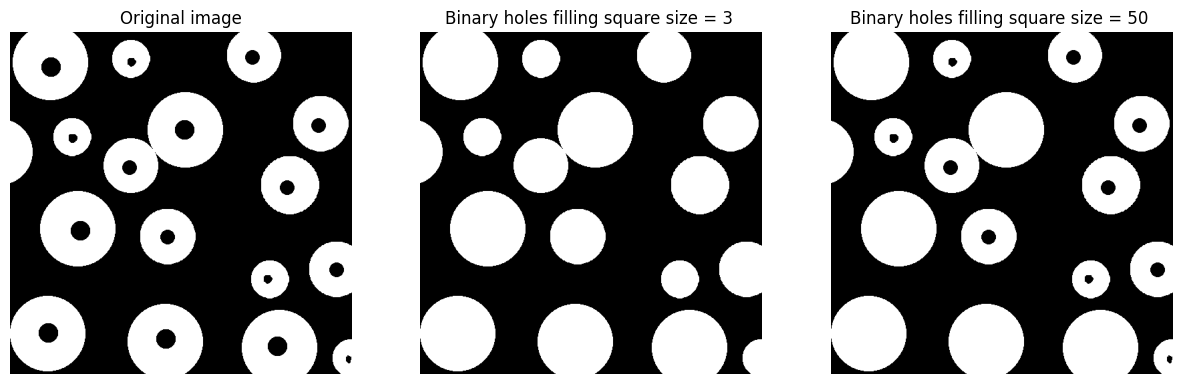

In [51]:
# from scipy.ndimage.morphology import binary_fill_holes
from scipy.ndimage import binary_fill_holes
import numpy as np

im = io.imread('images/washers.tif')
im = im < 0.5 
print(im.shape)

im_fill1 = binary_fill_holes(im, structure=np.ones((3,3)))
im_fill2 = binary_fill_holes(im, structure=np.ones((50,50)))

plt.gray()
plt.figure(figsize = (15,12))
plt.subplot(131), plt.imshow(im), plt.axis('off'), plt.title('Original image')
plt.subplot(132), plt.imshow(im_fill1), plt.axis('off'), plt.title('Binary holes filling square size = 3 ')
plt.subplot(133), plt.imshow(im_fill2), plt.axis('off'), plt.title('Binary holes filling square size = 50 ')

# 3 Morphological Operations on Grayscale Images  
You can also apply morphological operations on grayscale images.

## 3.1  Dilation and Erosion on Grayscale Images 
The following code applies multiple dilations and erosions on a grayscale image.  

(<AxesSubplot: title={'center': 'Image after an erosion and dilation'}>,
 (-0.5, 463.5, 447.5, -0.5),
 Text(0.5, 1.0, 'Image after an erosion and dilation'))

<Figure size 640x480 with 0 Axes>

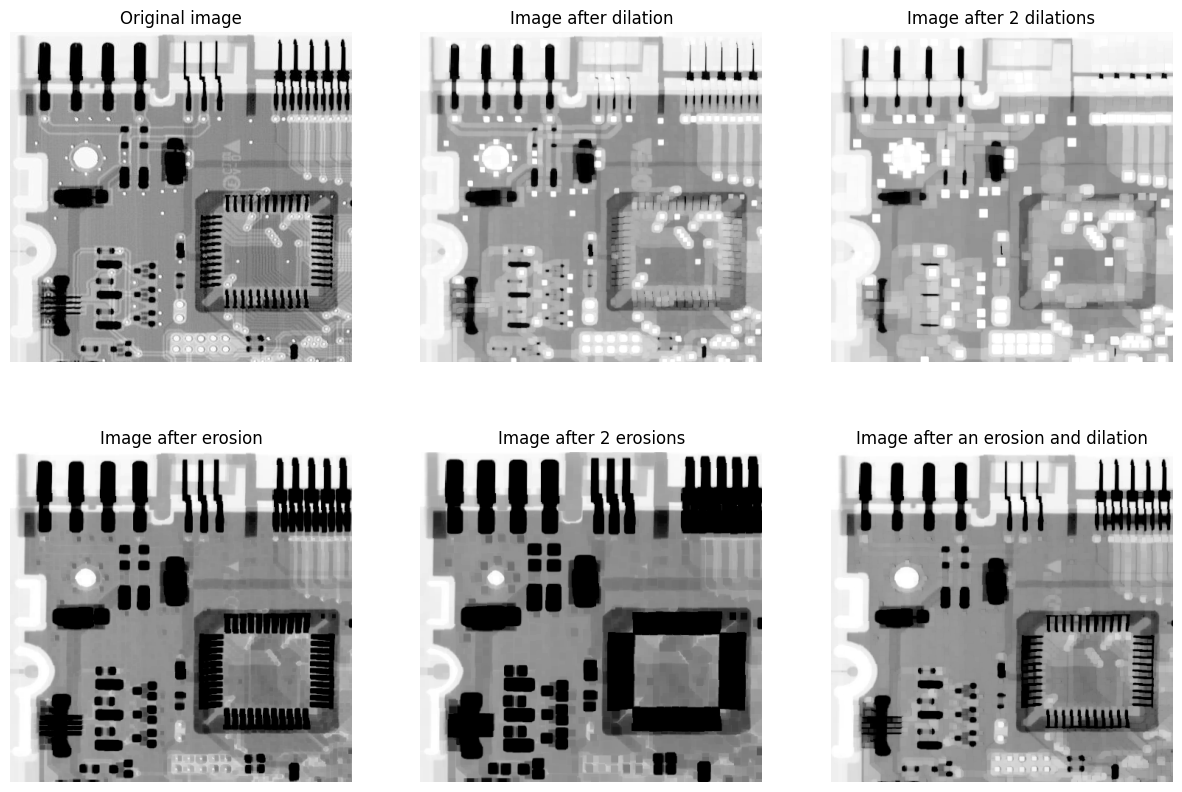

In [52]:
im = io.imread('images/ckt-board-orig.tif')
struct_elem = square(5)
im_dilate = dilation(im, struct_elem)
im_dilate2 = dilation(im_dilate, struct_elem)
im_erode = erosion(im, struct_elem)
im_erode2 = erosion(im_erode, struct_elem)
im_erode_dilate = dilation(im_erode, struct_elem)

plt.gray()
plt.figure(figsize = (15,10))
plt.subplot(2,3,1), plt.imshow(im), plt.axis('off'), plt.title('Original image')
plt.subplot(2,3,2), plt.imshow(im_dilate), plt.axis('off'), plt.title('Image after dilation')
plt.subplot(2,3,3), plt.imshow(im_dilate2), plt.axis('off'), plt.title('Image after 2 dilations')
plt.subplot(2,3,4), plt.imshow(im_erode), plt.axis('off'), plt.title('Image after erosion')
plt.subplot(2,3,5), plt.imshow(im_erode2), plt.axis('off'), plt.title('Image after 2 erosions')
plt.subplot(2,3,6), plt.imshow(im_erode_dilate), plt.axis('off'), plt.title('Image after an erosion and dilation')

# taking mimimum and minimum under mask. Not set theory
# min for erosion # darkens
# max for dialation (that pixel under the mask takes the maximum value) # brightens

## 3.2 Opening and Closing on Grayscale Images 

On the same grayscale image, apply with the same structing element
1) an opening 
2) an opening followed by another opening
3) a closing 
4) a closing followed by another closing
5) a closing followed by an opening.
Do the results change if you apply multiple openings or closings? 
### !!!!!

(<AxesSubplot: title={'center': 'Image after opening and closing'}>,
 (-0.5, 463.5, 447.5, -0.5),
 Text(0.5, 1.0, 'Image after opening and closing'))

<Figure size 640x480 with 0 Axes>

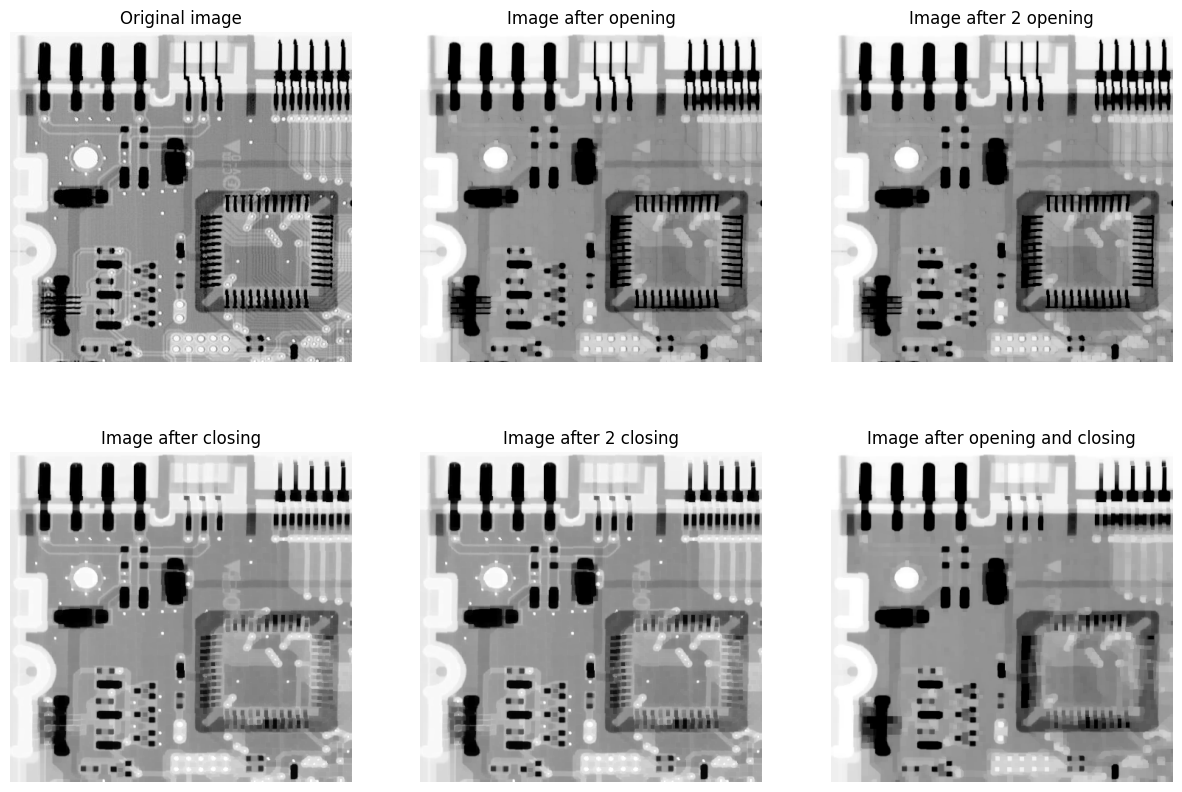

In [53]:
#
# Your code goes here 
#

im = io.imread('images/ckt-board-orig.tif')
struct_elem = square(5)
im_opening = opening(im, struct_elem)
im_opening2 = opening(im_opening, struct_elem)
im_close = closing(im, struct_elem)
im_close2 = closing(im_close, struct_elem)
im_opening_closing = closing(im_opening, struct_elem)

plt.gray()
plt.figure(figsize = (15,10))
plt.subplot(2,3,1), plt.imshow(im), plt.axis('off'), plt.title('Original image')
plt.subplot(2,3,2), plt.imshow(im_opening), plt.axis('off'), plt.title('Image after opening')
plt.subplot(2,3,3), plt.imshow(im_opening2), plt.axis('off'), plt.title('Image after 2 opening')
plt.subplot(2,3,4), plt.imshow(im_close), plt.axis('off'), plt.title('Image after closing')
plt.subplot(2,3,5), plt.imshow(im_close2), plt.axis('off'), plt.title('Image after 2 closing')
plt.subplot(2,3,6), plt.imshow(im_opening_closing), plt.axis('off'), plt.title('Image after opening and closing')

# taking mimimum and minimum under mask. Not set theory
# min for erosion # darkens
# max for dialation (that pixel under the mask takes the maximum value) # brightens

In [54]:
#++ repeating opening and closing -> image is not changing

## 3.3 Opening operations to estimate the difference in background intensities 

We can use the opening operation to estimate the difference in background intensities. The opening operation has the effect of removing objects that cannot completely contain the structuring element.  We can view the background approximation as a surface. 

(256, 256) (256, 256)


Text(0.5, 0, 'intensity')

<Figure size 640x480 with 0 Axes>

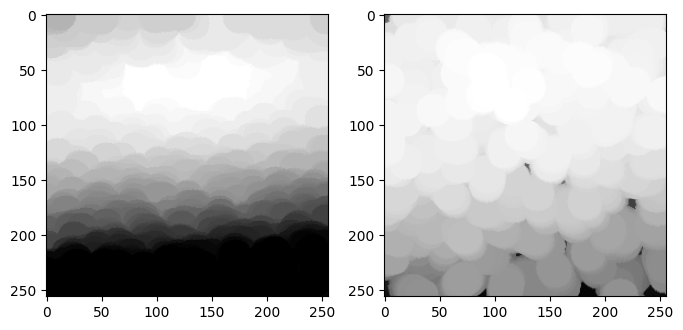

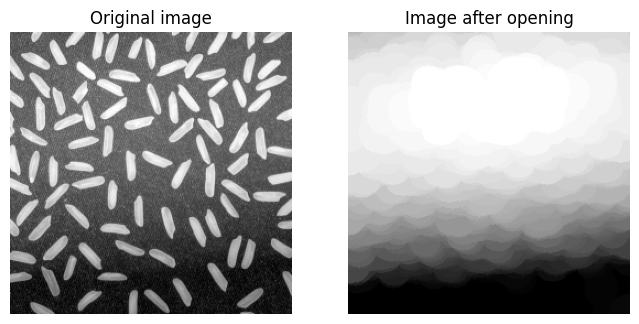

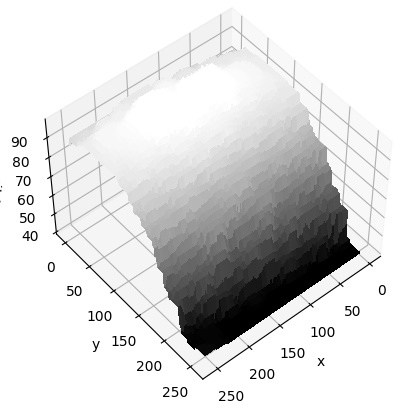

In [55]:
from mpl_toolkits.mplot3d import Axes3D  

im = io.imread('images/rice.png')

# opening with disk of radius - 15 pixels 
aaa=erosion(im,disk(15))
bbb=dilation(im,disk(15))
plt.gray()
plt.figure(figsize = (8,4))
plt.subplot(1,2,1), plt.imshow(aaa)
plt.subplot(1,2,2), plt.imshow(bbb)

background=opening(im,disk(15))
plt.gray()
plt.figure(figsize = (8,4))
plt.subplot(1,2,1), plt.imshow(im), plt.axis('off'), plt.title('Original image')
plt.subplot(1,2,2), plt.imshow(background), plt.axis('off'), plt.title('Image after opening')

# View the background approximation as a surface. 
X = np.arange(0, im.shape[1], 1) 
Y = np.arange(0, im.shape[0], 1)
X, Y = np.meshgrid(X, Y) # create a grid             
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
print(X.shape,background.shape)
ax.plot_surface(X, Y, background, cmap='gray', linewidth=0, antialiased=False)   
# specify viewing angle (try changing these values) 
ax.view_init(elev=50., azim=50) 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('intensity')

Subtract the background image from original image. Display the result (original image - background image). 

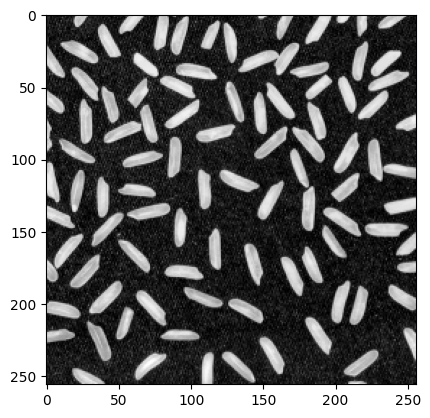

In [56]:
#
# Your code goes here 
# 
im2 = im - background

fig = plt.figure()
plt.imshow(im2, cmap='gray')

## 3.4 Tophat filtering
"white_tophat" is the subtraction of an opened image from the original. 

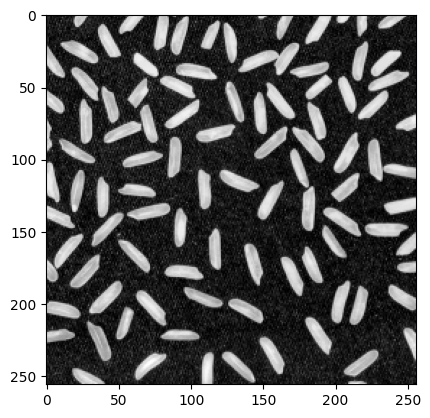

In [57]:
im2 = white_tophat(im, disk(15));
plt.figure
plt.imshow(im2,cmap='gray')

## 3.5 Noise removal 
Morphological operations can also be used to remove noise. The following removes salt and pepper noise with opening and closing. 

<Figure size 640x480 with 0 Axes>

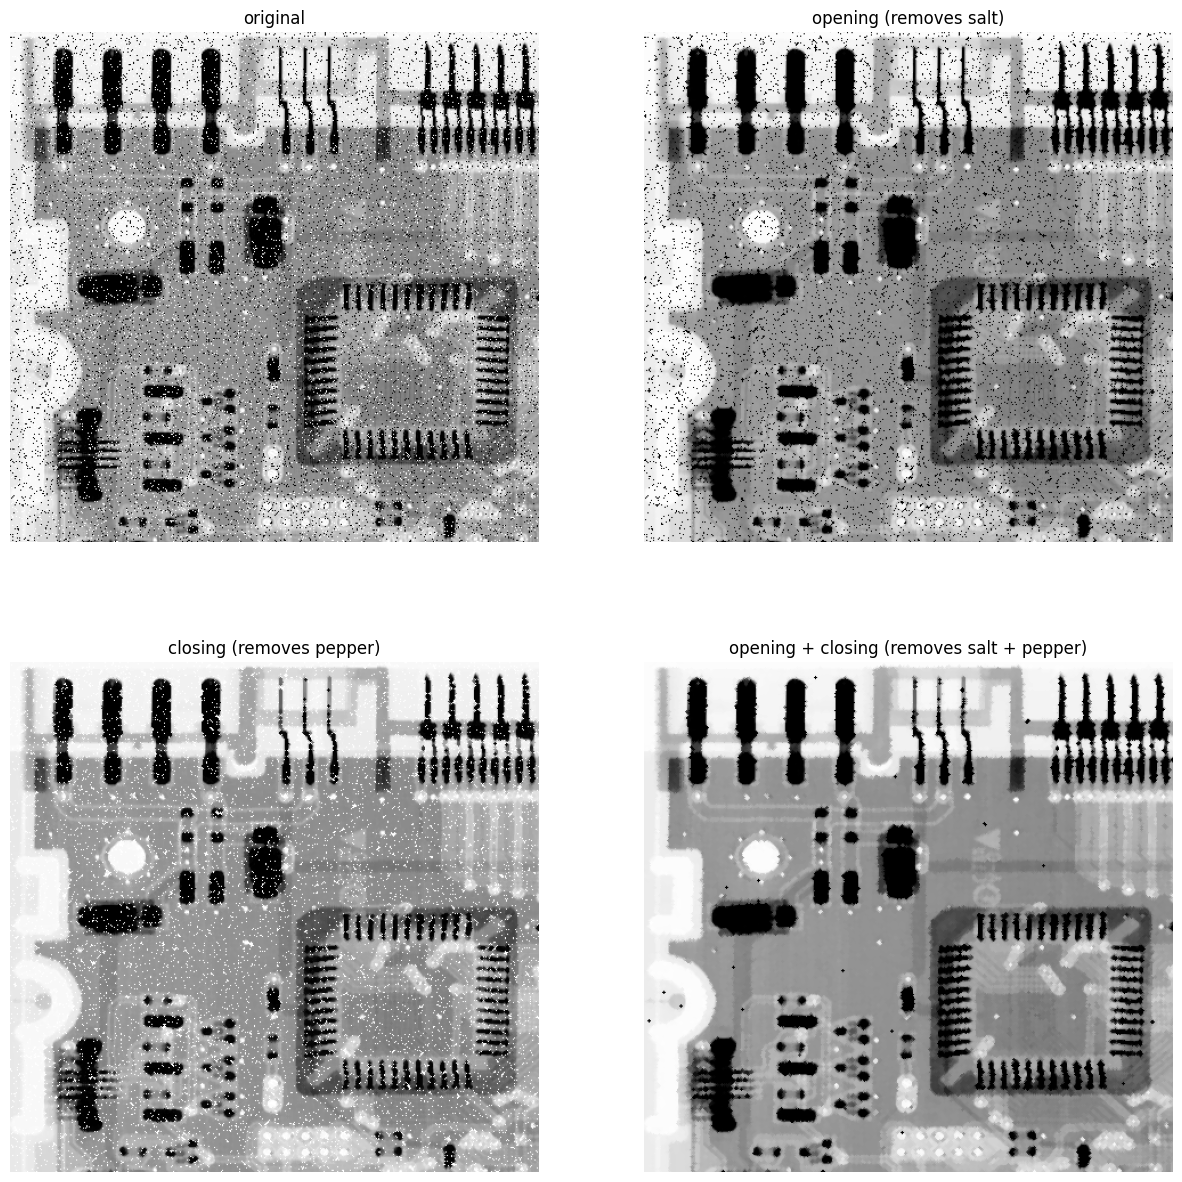

In [58]:
# noise removal with opening and closing
from skimage.util import random_noise
im = io.imread('images/ckt-board-orig.tif')
im_noisy_sp = random_noise(im, seed=42, mode='s&p', amount=0.1)

plt.gray()
im_o = opening(im_noisy_sp, disk(1))
im_c = closing(im_noisy_sp, disk(1))
im_oc = closing(opening(im_noisy_sp,disk(1))) # ++ remove salt and pepper noise with
# opening removes salt ??? ++
# closing removes pepper

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(im_noisy_sp), plt.title('original'), plt.axis('off')
plt.subplot(222), plt.imshow(im_o), plt.title('opening (removes salt)'), plt.axis('off')
plt.subplot(223), plt.imshow(im_c), plt.title('closing (removes pepper)'),plt.axis('off')
plt.subplot(224), plt.imshow(im_oc), plt.title('opening + closing (removes salt + pepper)')
plt.axis('off')
plt.show()

The following code shows how to use structuring elements for morphological median filter. The structuring elements used are disks with different sizes in order to remove the noise with the median filter:

C:\Users\tobi1\AppData\Local\Temp\ipykernel_30156\3913264431.py:12: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  plt.subplot(222), plt.imshow(median(im_noisy_sp, disk(1))), plt.title('Median (disk radius = 1)'), plt.axis('off')
C:\Users\tobi1\AppData\Local\Temp\ipykernel_30156\3913264431.py:13: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  plt.subplot(223), plt.imshow(median(im_noisy_sp, disk(3))), plt.title('Median (disk radius = 5)'),plt.axis('off')
C:\Users\tobi1\AppData\Local\Temp\ipykernel_30156\3913264431.py:14: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  plt.subplot(224

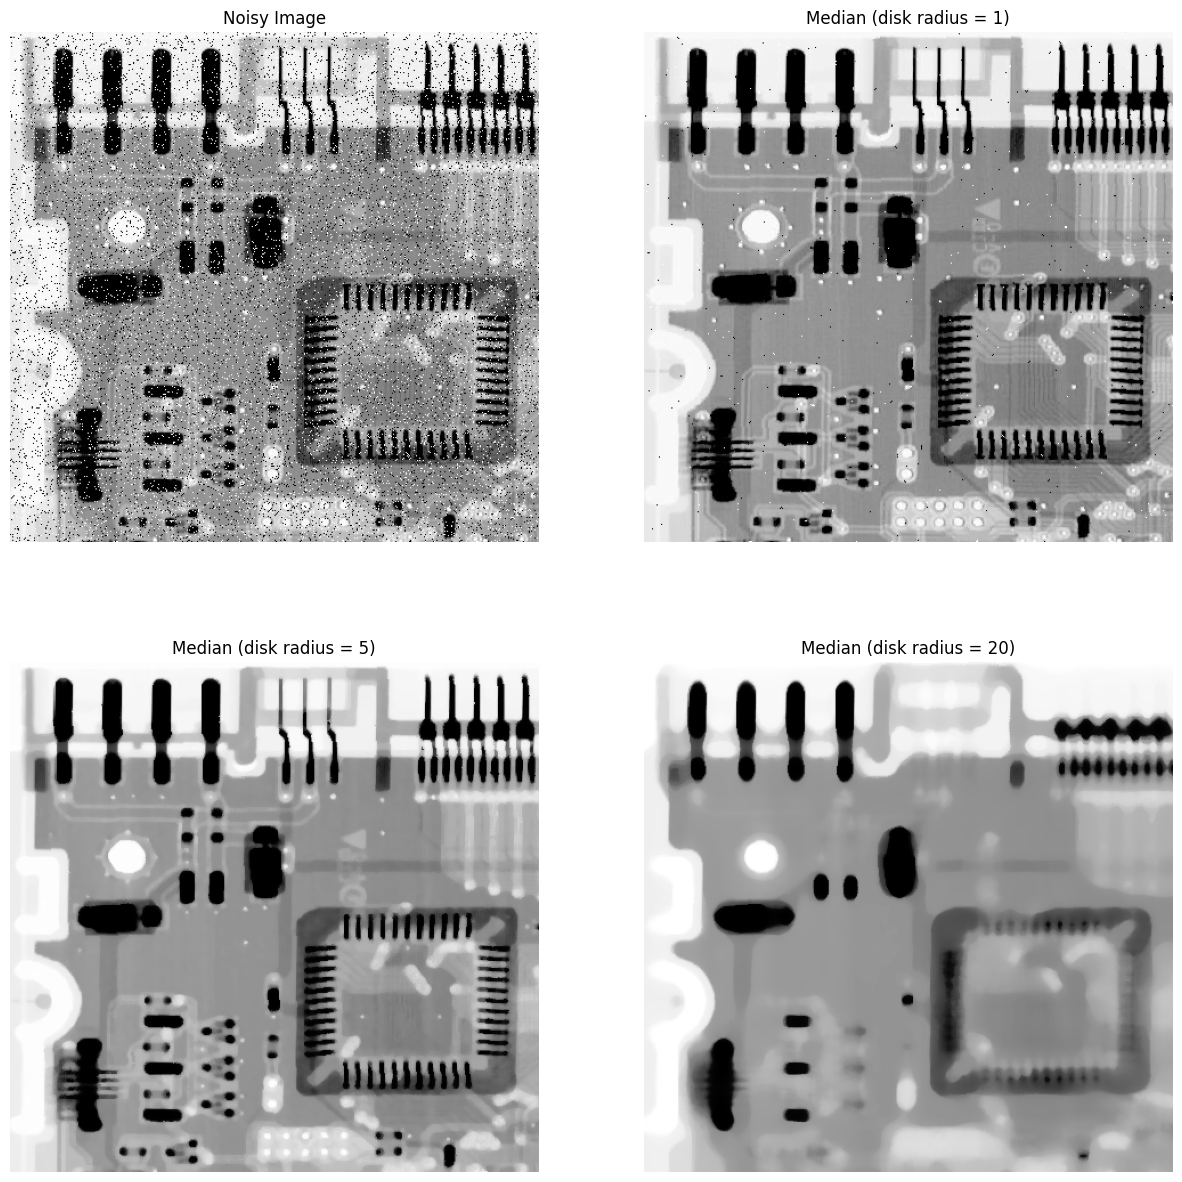

In [59]:
# noise removal with a median filter
from skimage.filters.rank import median
from skimage.morphology import disk
im = io.imread('images/ckt-board-orig.tif')
im_noisy_sp = random_noise(im, seed=42, mode='s&p', amount=0.1) 

# median(im_noisy_sp, disk(1) #removes salt and pepper noise
#++ good for denoising (here only one operation compared to opening and closing)

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(im_noisy_sp), plt.title('Noisy Image'), plt.axis('off')
plt.subplot(222), plt.imshow(median(im_noisy_sp, disk(1))), plt.title('Median (disk radius = 1)'), plt.axis('off')
plt.subplot(223), plt.imshow(median(im_noisy_sp, disk(3))), plt.title('Median (disk radius = 5)'),plt.axis('off')
plt.subplot(224), plt.imshow(median(im_noisy_sp, disk(10))), plt.title('Median (disk radius = 20)')
plt.axis('off')
plt.show()

# 4 Labelling connected components and shape and region properties 
In a binary image, sets of white pixels which are connected to each other are called connected components or objects. We can calculate shape or region properties of these objects. Once again, we use the image of the rice grains. First, we perform adaptive thresholding on the image and then we connect the components. 

Text(0.5, 1.0, 'Labeled Objects')

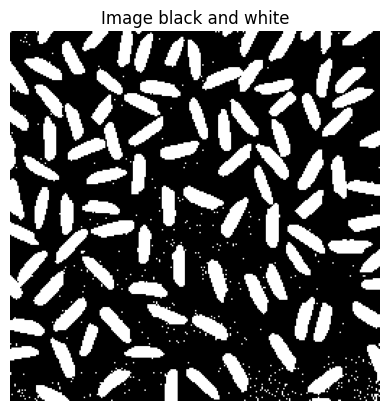

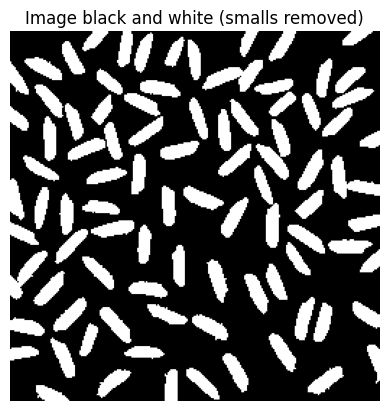

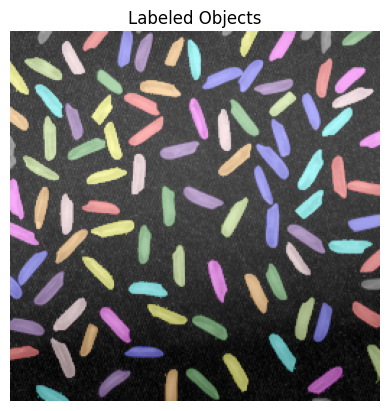

In [60]:
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects
from skimage.color import label2rgb
from skimage import filters
import math

im = io.imread("images/rice.png")     # read image from disk, provide the correct path 
im = im.astype(float)
im = im-im.min()
im = im/im.max()
block_size = 55
imbw = im > filters.threshold_local(im, block_size, method = 'mean')

# remove objects less than 100 pixels 
imbw1 = remove_small_objects(imbw, 100, connectivity=1)

# connect the components 
label_img = label(imbw1) #++ for each connected component
image_label_overlay = label2rgb(label_img, image=im, bg_label = 0)

plt.figure()
plt.imshow(imbw)
plt.axis('off')
plt.title('Image black and white')

plt.figure()
plt.imshow(imbw1)
plt.axis('off')
plt.title('Image black and white (smalls removed)')

plt.figure()
plt.imshow(image_label_overlay)
plt.axis('off')
plt.title('Labeled Objects')

## Calculating shape and region properties 
Regionprops is a function used to return properties of each object found by connected components. The following code applies regionprops, prints of the first object properties, displays the ID of each object at it's centroid.  

Some properties of the 1st object
Orientation: -0.8802280518096233 Boundingbox: (0, 50, 14, 68) Major Axis Length: 20.3519185148573


(-0.5, 255.5, 255.5, -0.5)

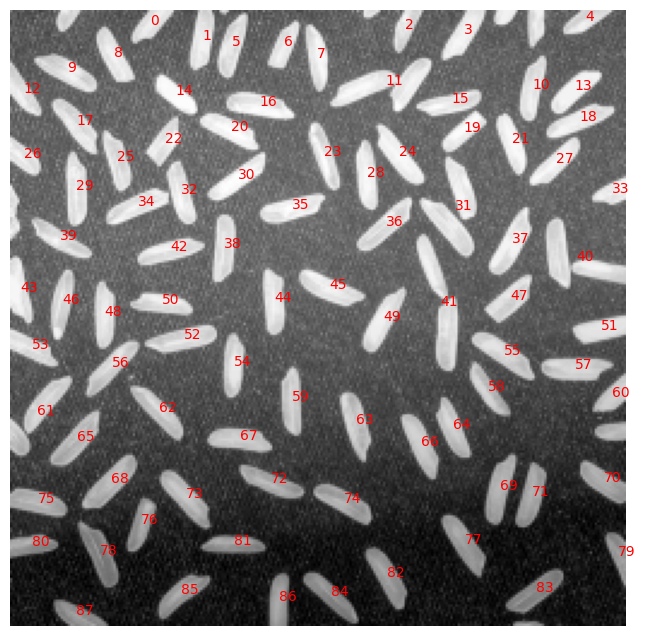

In [61]:
regions = regionprops(label_img)

plt.figure(figsize=(8,8))
plt.imshow(im, cmap=plt.cm.gray)

print('Some properties of the 1st object')
print('Orientation:', regions[0].orientation, 'Boundingbox:', regions[0].bbox , 'Major Axis Length:', regions[0].major_axis_length)

for (i, props) in zip(range(len(regions)), regions):
    # , displays the ID of each object at it's centroid.  
    y0, x0 = props.centroid
    plt.text(x0, y0,i,color='r')

plt.axis('off')    
# ++ width, height, size etc


# 5 Thinning and Skeletonization 
Thinning reduces the binary objects or shapes to strokes that are a single pixel wide. Skeletonisation also reduces the image objects to a set of thin strokes. However, this approach retains important information about the shapes of the original objects. The following code implements thining and skeletonization.  

(Text(0.5, 1.0, 'Thinned Partial'), (-0.5, 599.5, 999.5, -0.5))

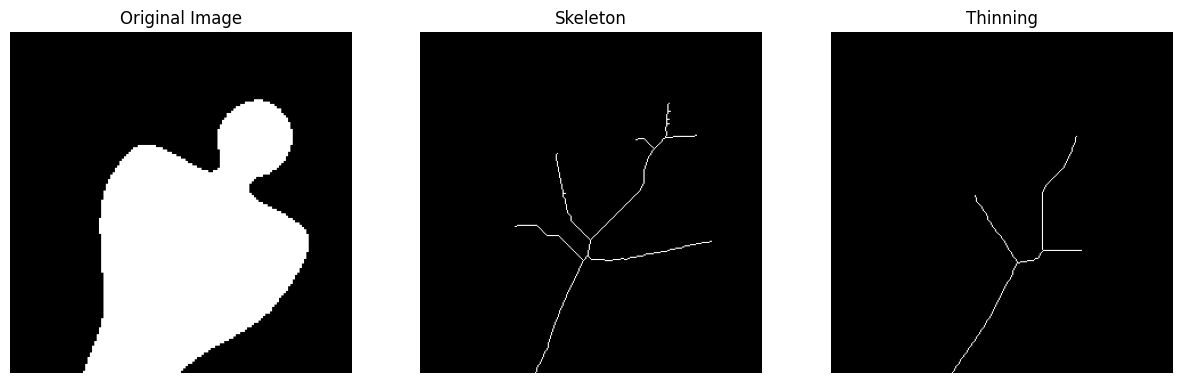

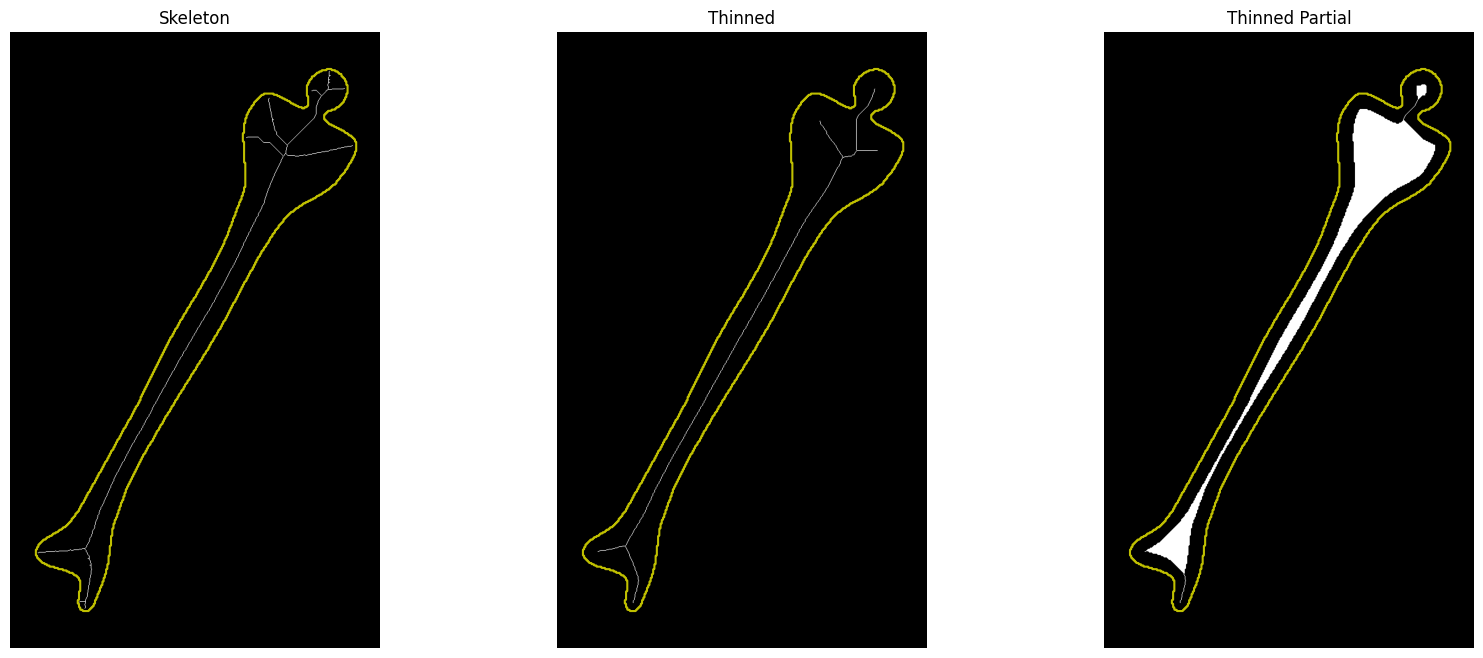

In [62]:
from skimage.morphology import skeletonize, thin

im = img_as_float(io.imread('images/legbone.tif')) 
# Sample answer 
skeleton = skeletonize(im)
thinned = thin(im)
# partial thinning for 25 interations 
thinned_partial = thin(im, max_num_iter=25)

# Display just a part of the image 
plt.figure(figsize=(15,8))
plt.subplot(131), plt.imshow(im[1:300,300:im.shape[1]]), 
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(skeleton[1:300,300:im.shape[1]]), 
plt.title('Skeleton'), plt.axis('off')
plt.subplot(133), plt.imshow(thinned[1:300,300:im.shape[1]]),  
plt.title('Thinning'), plt.axis('off')

# display the whole image with contours 
plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(skeleton), 
plt.contour(im, [0.5], colors='y'), 
plt.title('Skeleton'), plt.axis('off')
plt.subplot(132), plt.imshow(thinned), 
plt.contour(im, [0.5], colors='y'), 
plt.title('Thinned'), plt.axis('off') 
plt.subplot(133), plt.imshow(thinned_partial),
plt.contour(im, [0.5], colors='y'), 
from skimage.util import random_noise
plt.title('Thinned Partial'), plt.axis('off') 

## Adding salt noise to the image
Skeletonization and thinning are very senstive to noise. The following code adds noise to the edges of the binary image. 
Apply skeletonization and thinning on this image (im_noisy_s) and display the results. 

(Text(0.5, 1.0, 'Thinning noisy'), (-0.5, 149.5, 149.5, -0.5))

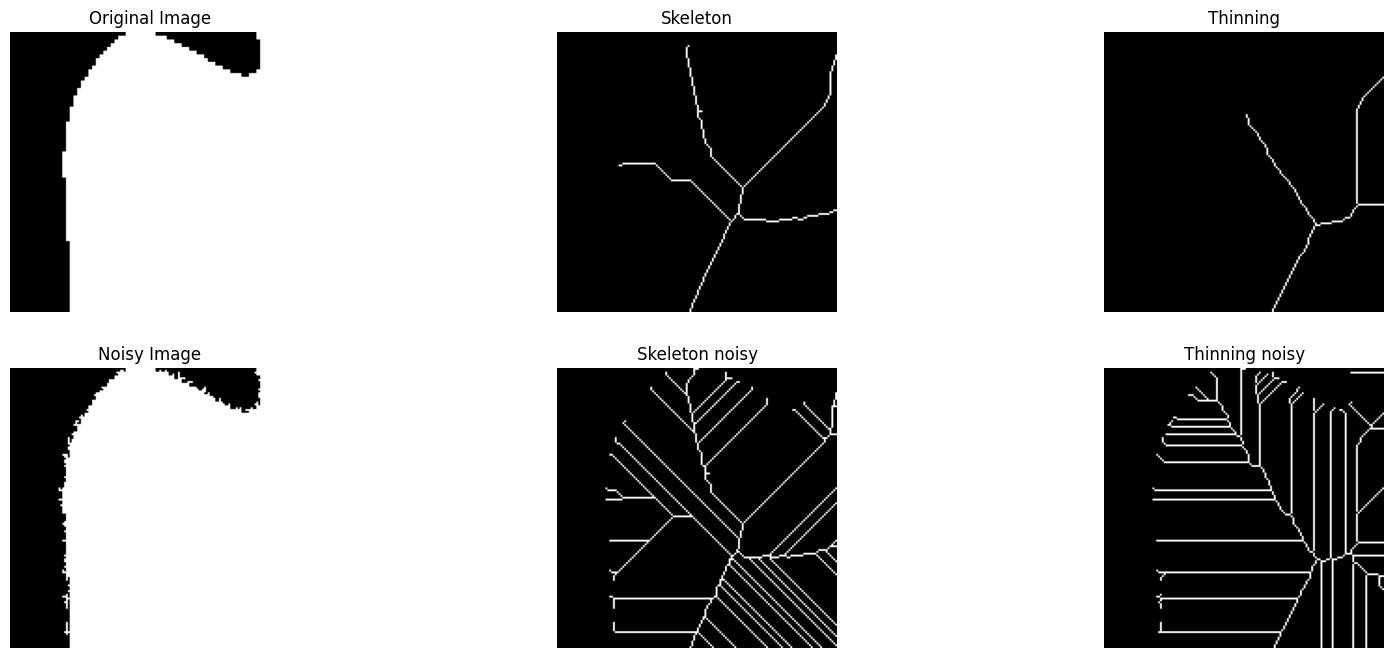

In [63]:
from skimage.util import random_noise

# adding salt noise and removing 'white' pixels which do not touch the object 
im_noisy_s = random_noise(im, seed=42, mode='salt', amount=0.3)
im_noisy_s = im_noisy_s> 0.5 # to convert float to bool
im_noisy_s = remove_small_objects(im_noisy_s, 100, connectivity=1)

# 
plt.figure(figsize=(20,8))


#
# Your code goes here 
#
skeleton = skeletonize(im)
thinned = thin(im)

skeleton_noisy = skeletonize(im_noisy_s)
thinned_noisy = thin(im_noisy_s)


# Display just a part of the image 
plt.subplot(231), plt.imshow(im[100:250,350:500]),
plt.title('Original Image'), plt.axis('off')

plt.subplot(232), plt.imshow(skeleton[100:250,350:500]), 
plt.title('Skeleton'), plt.axis('off')
plt.subplot(233), plt.imshow(thinned[100:250,350:500]),  
plt.title('Thinning'), plt.axis('off')

plt.subplot(234), plt.imshow(im_noisy_s[100:250,350:500])
plt.title('Noisy Image'), plt.axis('off')

plt.subplot(235), plt.imshow(skeleton_noisy[100:250,350:500]), 
plt.title('Skeleton noisy'), plt.axis('off')
plt.subplot(236), plt.imshow(thinned_noisy[100:250,350:500]), 
plt.title('Thinning noisy'), plt.axis('off')

## Adding pepper noise to the image
Add 0.5% of pepper noise to the image. Dislay what your noisy image looks like. Perform skeletonization 
The following code adds pepper noise to the image. Display what your noisy image and skeleton looks like.  

(Text(0.5, 1.0, 'Thinning noisy'), (-0.5, 149.5, 149.5, -0.5))

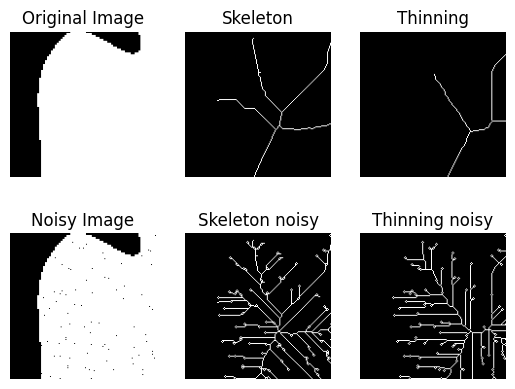

In [64]:
# Adding 0.5% pepper noise 
im_noisy_p = random_noise(im, seed=42, mode='pepper', amount=0.005)
#
# Your code goes here. 
# 
skeleton = skeletonize(im)
thinned = thin(im)

skeleton_p = skeletonize(im_noisy_p)
thinned_p = thin(im_noisy_p)

# Display just a part of the image 


# Display just a part of the image 
plt.subplot(231), plt.imshow(im[100:250,350:500]),
plt.title('Original Image'), plt.axis('off')

plt.subplot(232), plt.imshow(skeleton[100:250,350:500]), 
plt.title('Skeleton'), plt.axis('off')
plt.subplot(233), plt.imshow(thinned[100:250,350:500]),  
plt.title('Thinning'), plt.axis('off')

plt.subplot(234), plt.imshow(im_noisy_p[100:250,350:500])
plt.title('Noisy Image'), plt.axis('off')

plt.subplot(235), plt.imshow(skeleton_p[100:250,350:500]), 
plt.title('Skeleton noisy'), plt.axis('off')
plt.subplot(236), plt.imshow(thinned_p[100:250,350:500]), 
plt.title('Thinning noisy'), plt.axis('off')


# 6 Advanced Level
# Limitations skeletonization after simple thresholding
1. Load the image of a phone receiver (This part has been done for you) 
2. Obtain a binary image by thresholding the image at values less than 0.4 
3. Obtain the image skeleton which will look like something below
![alt text](images/skel_noisy.png "Skeleton after thresholding")

This example shows that simple thresholding is often not sufficient to produce a useful binary image. The skeleton of the binary image is much more complex compared to an ideal shape of the telephone receiver. Further processing of often required before skeletoizing the image such as morphological 

4. Try to improve the binary image of the telephone receiver so that its skeleton becomes less complex and better represents the shape of the receiver. An example of a less complex skeleton obtained after morphological operations is: 

![alt text](images/skel_clean.png "Skeleton after thresholding and morphological operations")



In [65]:
from skimage import color

# load the data 
im_c = img_as_float(io.imread('images/phn1.png'))

# data might be a rgba/rgb image 
if im_c.shape[2] == 4 : 
    #convert an rgba image to grayscale
    im = color.rgb2gray(color.rgba2rgb(im_c))
elif im_c.shape[2] == 3 :
    #convert a rgb image to grayscale 
    im = color.rgb2gray(im_c)

# check that the image is grayscale 
print(im.shape)
#
# Your code goes here 
#

(384, 510)


Text(0.5, 1.0, 'Skeleton image thresholded')

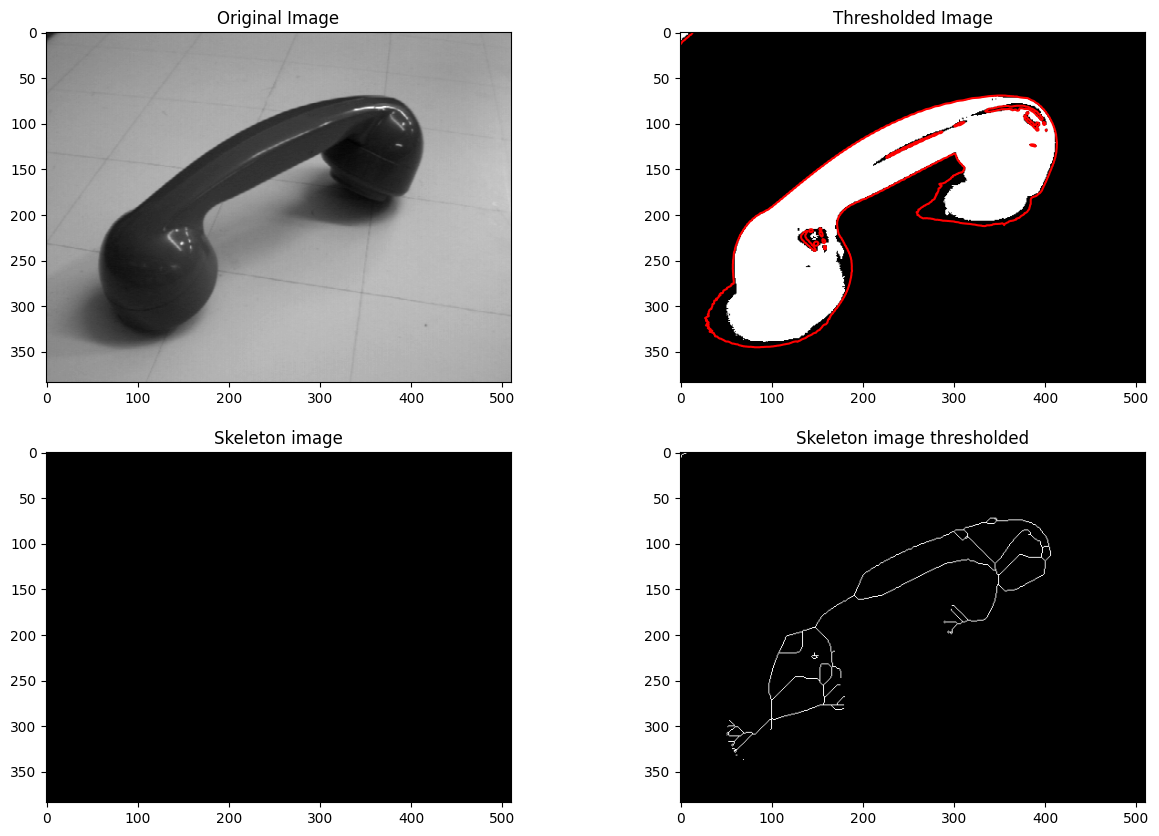

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(im)
plt.title('Original Image') #darker than the background -> threshold

im2bw = im < 0.386
plt.subplot(2,2,2)
plt.imshow(im2bw)
plt.title('Thresholded Image') 
plt.contour(im, [0.5], colors='r')

plt.subplot(2,2,3)
plt.imshow(skeletonize(im)) # does not work! -> need binary ++
plt.title('Skeleton image')

plt.subplot(2,2,4)
plt.imshow(skeletonize(im2bw))
plt.title('Skeleton image thresholded')

In [67]:
# can we make skeleton better?

Text(0.5, 1.0, 'Thresholded, binary holes filled, closed image skeleton')

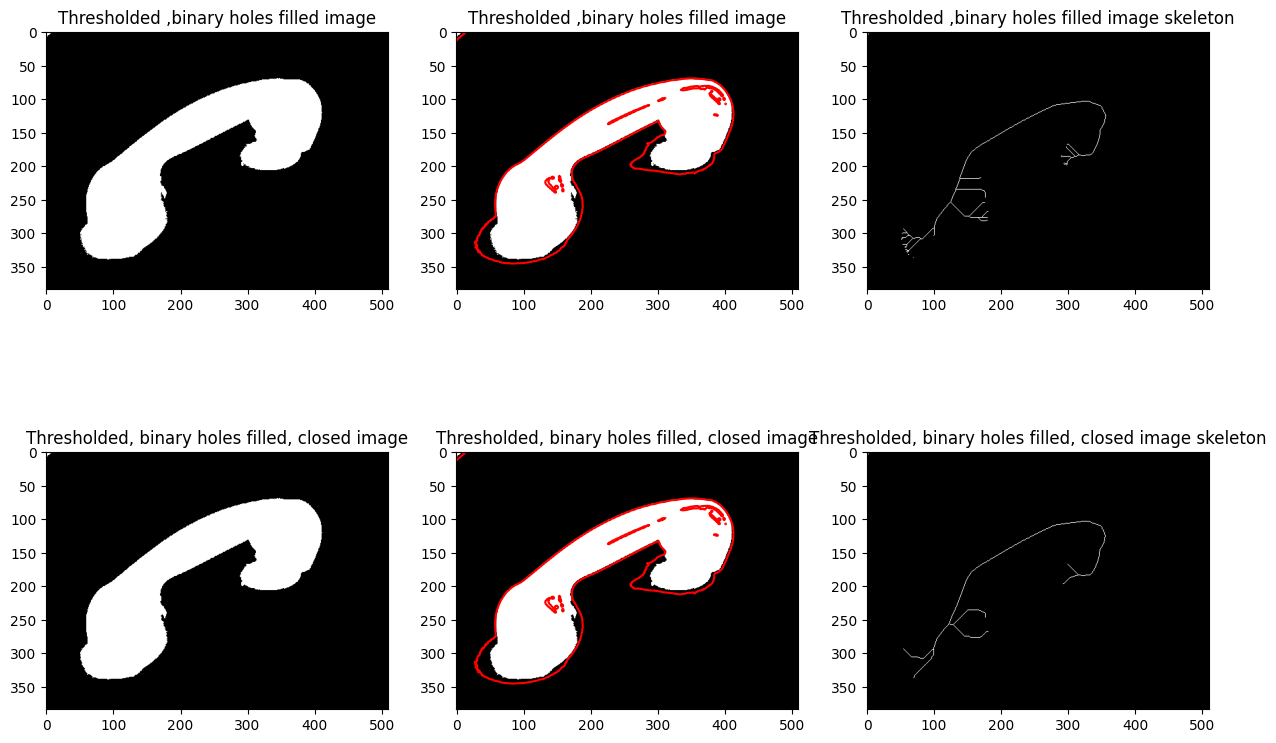

In [68]:
plt.figure(figsize=(15,10))


im2bw = im < 0.386

# fill the image holes
im2bw_fill = binary_fill_holes(im2bw, structure = np.ones((3,3)))
# Apply closing (1.erosion 2nd.diallation)
im2bw_fill_closed = binary_closing(im2bw_fill) 

plt.subplot(2,3,1)
plt.imshow(im2bw_fill)
plt.title('Thresholded ,binary holes filled image')

plt.subplot(2,3,2)
plt.imshow(im2bw_fill)
plt.title('Thresholded ,binary holes filled image')
plt.contour(im, [0.5], colors='r')

plt.subplot(2,3,3)
plt.imshow(skeletonize(im2bw_fill))
plt.title('Thresholded ,binary holes filled image skeleton')

plt.subplot(2,3,4)
plt.imshow(im2bw_fill_closed)
plt.title('Thresholded, binary holes filled, closed image')

plt.subplot(2,3,5)
plt.imshow(im2bw_fill_closed)
plt.title('Thresholded, binary holes filled, closed image')
plt.contour(im, [0.5], colors='r')

plt.subplot(2,3,6)
plt.imshow(skeletonize(im2bw_fill_closed))
plt.title('Thresholded, binary holes filled, closed image skeleton')